In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('healthcare_dataset.csv')

In [11]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [13]:
data.shape

(10000, 15)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [21]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [23]:
checking_duplicate_values = data.duplicated().sum()
print(f' this data contains {checking_duplicate_values} duplicate values')

 this data contains 0 duplicate values


In [25]:
data.describe().style.background_gradient(cmap='RdYlBu')

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


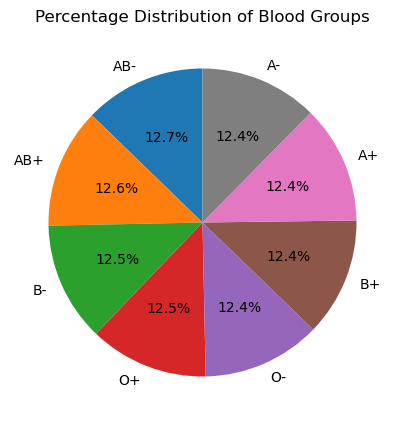

In [27]:
# checking the blood percentage in the data set
blood_group_counts = data['Blood Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(blood_group_counts, labels=blood_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Blood Groups')
plt.show()

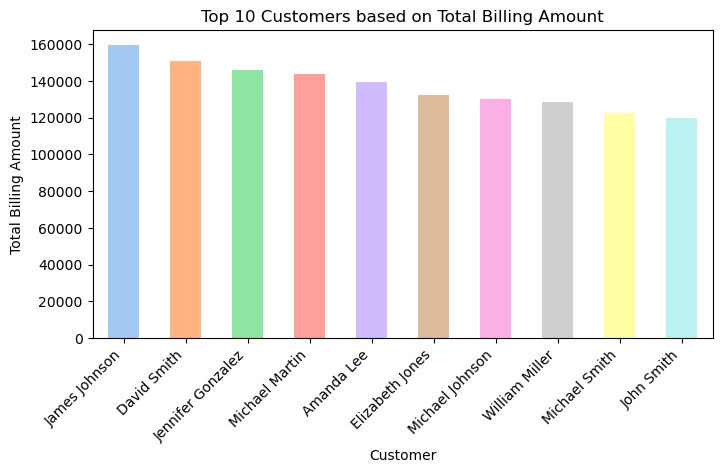

In [29]:
# checking the regular customers
# Group by customer and calculate the total billing amount for each customer
customer_totals = data.groupby('Name')['Billing Amount'].sum()

# Sort customers by total billing amount in descending order and select the top 10
top_10_customers = customer_totals.sort_values(ascending=False).head(10)

# Define a color palette
colors = sns.color_palette("pastel")

# Plotting the bar graph
plt.figure(figsize=(8, 4))
top_10_customers.plot(kind='bar', color=colors)
plt.title('Top 10 Customers based on Total Billing Amount')
plt.xlabel('Customer')
plt.ylabel('Total Billing Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

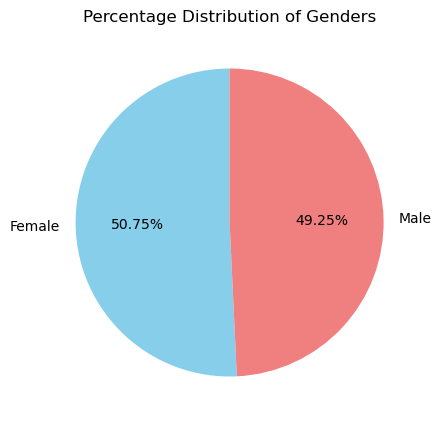

In [31]:
# Finding the gender percentage
gender_counts = data['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.2f%%', startangle=90,colors=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Genders')
plt.show()

In [33]:
#which medication used different medical conditions
data.groupby('Medical Condition')['Medication'].value_counts().sort_values(ascending=False).unstack().style.background_gradient(cmap='GnBu_r')

Medication,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
Medical Condition,,,,,
Arthritis,322,320,318,324,366
Asthma,370,340,346,310,342
Cancer,291,352,350,346,364
Diabetes,335,301,326,327,334
Hypertension,328,335,356,323,346
Obesity,322,328,319,332,327


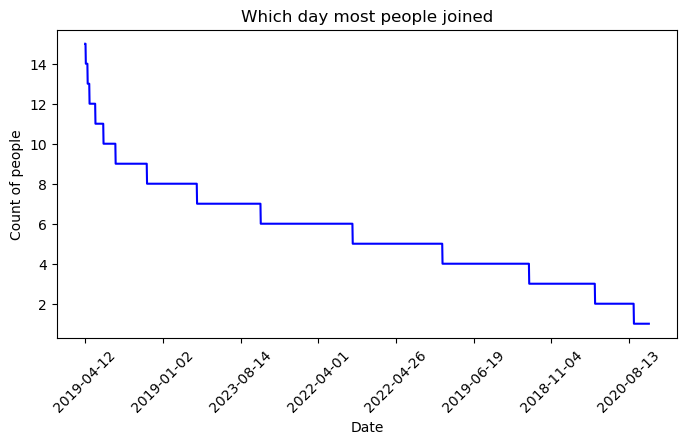

In [35]:
#find the which date most of the people joined
admission_counts = data['Date of Admission'].value_counts().sort_values(ascending=False)
# Plotting the bar graph
plt.figure(figsize=(8, 4))
admission_counts.plot(kind='line', color='blue')
plt.title('Which day most people joined')
plt.xlabel('Date')
plt.ylabel('Count of people')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

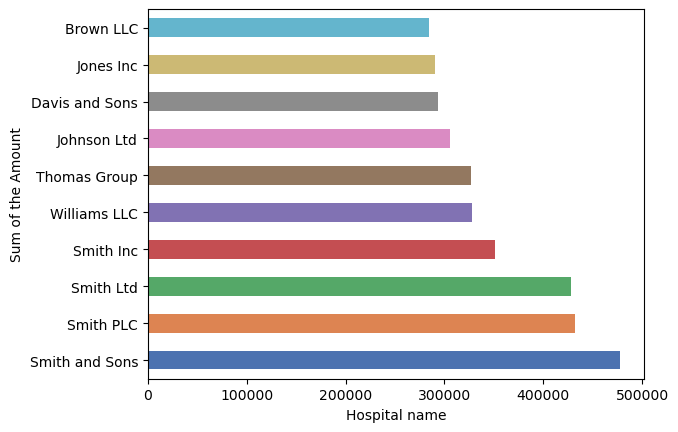

In [37]:
#the top 10 hospitals with the highest charges paid by patients
top_hospital=data.groupby('Hospital')['Billing Amount'].sum().sort_values(ascending=False).head(10)

colors = sns.color_palette("deep")

#plot the graph
plt.Figure(figsize=(8,4))
top_hospital.plot(kind='barh', color = colors)
plt.xlabel('Hospital name')
plt.ylabel('Sum of the Amount')
plt.show()

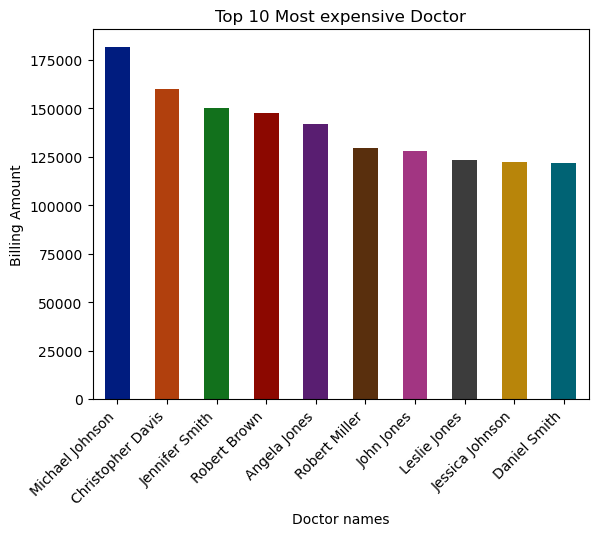

In [39]:
#find which doctor earns the most
top_earn = data.groupby('Doctor')['Billing Amount'].sum().sort_values(ascending=False).head(10)

colors = sns.color_palette('dark')

#plot the graph

plt.Figure(figsize=(8,4))
top_earn.plot(kind='bar', color = colors)
plt.xlabel('Doctor names')
plt.ylabel('Billing Amount')
plt.title('Top 10 Most expensive Doctor')
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
# find the admission type awith different medical conditions
data.groupby('Medical Condition')['Admission Type'].value_counts().sort_values(ascending=False).unstack().style.background_gradient(cmap='Oranges')

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,569,529,552
Asthma,570,556,582
Cancer,555,578,570
Diabetes,528,557,538
Hypertension,515,578,595
Obesity,505,569,554


In [43]:
# the average amount  for the gender with billing amount
data.groupby('Gender')['Billing Amount'].mean().sort_values(ascending=False)

Gender
Male      25550.215933
Female    25484.385085
Name: Billing Amount, dtype: float64

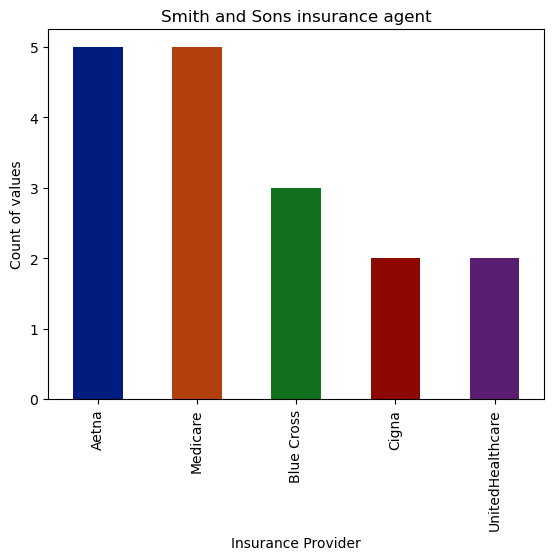

In [45]:
# find the smith and sons hospital insurance cover
insurance = data.groupby('Hospital')['Insurance Provider'].value_counts().loc['Smith and Sons']

colors = sns.color_palette('dark')


#plot graph
plt.Figure(figsize=(6,4))
plt.title('Smith and Sons insurance agent')
plt.xlabel('Insurance Agent')
plt.ylabel('Count of values')
insurance.plot(kind='bar',color=colors)
plt.show()

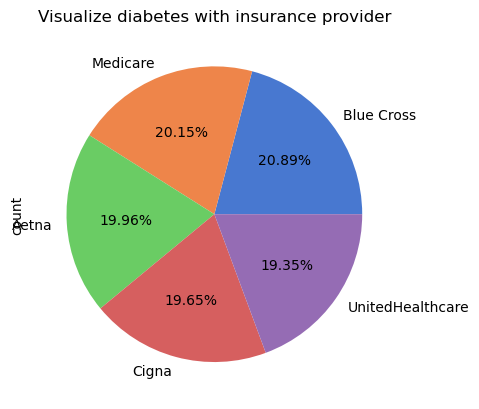

<Figure size 400x300 with 0 Axes>

In [47]:
# find which insurance are providing insurance for diabetes
diabetes = data[data['Medical Condition'] == 'Diabetes']['Insurance Provider'].value_counts()

colors = sns.color_palette('muted')
# plot the graph
diabetes.plot(kind='pie', colors=colors, labels=diabetes.index,autopct='%1.2f%%')
plt.title('Visualize diabetes with insurance provider')
plt.figure(figsize=(4,3))
plt.show()

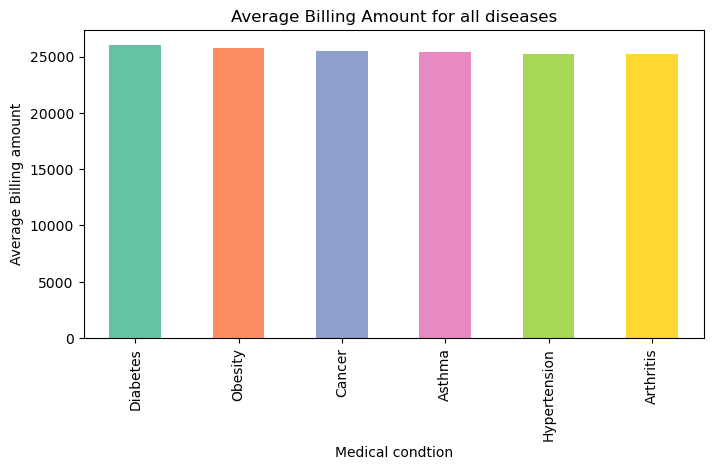

In [49]:
#find the average billing amount for each disease
disease = data.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)

colors=sns.color_palette('Set2')

#plot the graph
plt.figure(figsize=(8,4))
disease.plot(kind='bar',color=colors)
plt.xlabel('Medical condtion')
plt.ylabel('Average Billing amount')
plt.title('Average Billing Amount for all diseases')
plt.show()